## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.483803  0.841762 -0.132713 -1.335020 -0.161817 -2.163069
1  0.406135 -0.867367  0.017827 -0.767460 -1.661612 -1.392358
2 -1.389056  0.560137 -1.191532  1.482223  0.528871  0.329462
3  0.574189 -1.457259  1.217787 -0.059259 -0.408275 -0.625971
4  1.298064 -0.954224  0.829454 -1.298547 -0.818208 -0.894086


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9876697	total: 69ms	remaining: 1m 8s
1:	learn: 0.9757328	total: 69.7ms	remaining: 34.8s
2:	learn: 0.9635974	total: 70.3ms	remaining: 23.4s
3:	learn: 0.9533072	total: 70.8ms	remaining: 17.6s
4:	learn: 0.9423982	total: 71.4ms	remaining: 14.2s
5:	learn: 0.9324723	total: 71.9ms	remaining: 11.9s
6:	learn: 0.9214324	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9096982	total: 73.1ms	remaining: 9.06s
8:	learn: 0.9001933	total: 73.6ms	remaining: 8.1s
9:	learn: 0.8901125	total: 74.2ms	remaining: 7.34s
10:	learn: 0.8803897	total: 74.6ms	remaining: 6.7s
11:	learn: 0.8699561	total: 75.1ms	remaining: 6.18s
12:	learn: 0.8587268	total: 75.5ms	remaining: 5.74s
13:	learn: 0.8497295	total: 76ms	remaining: 5.35s
14:	learn: 0.8424869	total: 76.5ms	remaining: 5.02s
15:	learn: 0.8352197	total: 77ms	remaining: 4.74s
16:	learn: 0.8268221	total: 77.5ms	remaining: 4.48s
17:	learn: 0.8193863	total: 78.1ms	remaining: 4.26s
18:	learn: 0.8126628	total: 78.7ms	remaining: 4.06s


60:	learn: 0.5400123	total: 97ms	remaining: 1.49s
61:	learn: 0.5355064	total: 97.9ms	remaining: 1.48s
62:	learn: 0.5304461	total: 98.3ms	remaining: 1.46s
63:	learn: 0.5251295	total: 98.9ms	remaining: 1.45s
64:	learn: 0.5212802	total: 99.5ms	remaining: 1.43s
65:	learn: 0.5173602	total: 100ms	remaining: 1.42s
66:	learn: 0.5134701	total: 101ms	remaining: 1.4s
67:	learn: 0.5087344	total: 101ms	remaining: 1.39s
68:	learn: 0.5051651	total: 102ms	remaining: 1.37s
69:	learn: 0.5003635	total: 102ms	remaining: 1.36s
70:	learn: 0.4961419	total: 103ms	remaining: 1.35s
71:	learn: 0.4915473	total: 103ms	remaining: 1.33s
72:	learn: 0.4865241	total: 104ms	remaining: 1.32s
73:	learn: 0.4815631	total: 104ms	remaining: 1.31s
74:	learn: 0.4765491	total: 105ms	remaining: 1.29s
75:	learn: 0.4734108	total: 105ms	remaining: 1.28s
76:	learn: 0.4693223	total: 106ms	remaining: 1.27s
77:	learn: 0.4650265	total: 106ms	remaining: 1.26s
78:	learn: 0.4615743	total: 107ms	remaining: 1.25s
79:	learn: 0.4583218	total: 1

115:	learn: 0.3410911	total: 124ms	remaining: 946ms
116:	learn: 0.3383492	total: 125ms	remaining: 942ms
117:	learn: 0.3362916	total: 125ms	remaining: 937ms
118:	learn: 0.3344204	total: 126ms	remaining: 932ms
119:	learn: 0.3321067	total: 126ms	remaining: 927ms
120:	learn: 0.3298366	total: 127ms	remaining: 922ms
121:	learn: 0.3277015	total: 127ms	remaining: 916ms
122:	learn: 0.3256025	total: 128ms	remaining: 910ms
123:	learn: 0.3230768	total: 128ms	remaining: 904ms
124:	learn: 0.3208882	total: 128ms	remaining: 899ms
125:	learn: 0.3185547	total: 129ms	remaining: 893ms
126:	learn: 0.3164703	total: 129ms	remaining: 888ms
127:	learn: 0.3136996	total: 130ms	remaining: 883ms
128:	learn: 0.3108163	total: 130ms	remaining: 879ms
129:	learn: 0.3089483	total: 130ms	remaining: 873ms
130:	learn: 0.3070200	total: 131ms	remaining: 868ms
131:	learn: 0.3046085	total: 131ms	remaining: 864ms
132:	learn: 0.3021972	total: 132ms	remaining: 859ms
133:	learn: 0.2995413	total: 132ms	remaining: 855ms
134:	learn: 

335:	learn: 0.0831580	total: 233ms	remaining: 460ms
336:	learn: 0.0829270	total: 233ms	remaining: 459ms
337:	learn: 0.0823006	total: 233ms	remaining: 457ms
338:	learn: 0.0816889	total: 234ms	remaining: 456ms
339:	learn: 0.0812575	total: 234ms	remaining: 455ms
340:	learn: 0.0808343	total: 235ms	remaining: 454ms
341:	learn: 0.0804192	total: 235ms	remaining: 452ms
342:	learn: 0.0800094	total: 236ms	remaining: 451ms
343:	learn: 0.0795943	total: 236ms	remaining: 450ms
344:	learn: 0.0791114	total: 237ms	remaining: 449ms
345:	learn: 0.0787182	total: 237ms	remaining: 448ms
346:	learn: 0.0783020	total: 237ms	remaining: 447ms
347:	learn: 0.0779859	total: 238ms	remaining: 446ms
348:	learn: 0.0777782	total: 239ms	remaining: 445ms
349:	learn: 0.0773856	total: 239ms	remaining: 444ms
350:	learn: 0.0769656	total: 239ms	remaining: 443ms
351:	learn: 0.0767997	total: 240ms	remaining: 441ms
352:	learn: 0.0765416	total: 240ms	remaining: 441ms
353:	learn: 0.0760719	total: 241ms	remaining: 440ms
354:	learn: 

489:	learn: 0.0405018	total: 309ms	remaining: 322ms
490:	learn: 0.0403543	total: 310ms	remaining: 321ms
491:	learn: 0.0402768	total: 310ms	remaining: 320ms
492:	learn: 0.0401328	total: 311ms	remaining: 320ms
493:	learn: 0.0398882	total: 311ms	remaining: 319ms
494:	learn: 0.0398123	total: 312ms	remaining: 318ms
495:	learn: 0.0396769	total: 312ms	remaining: 317ms
496:	learn: 0.0396020	total: 313ms	remaining: 316ms
497:	learn: 0.0394689	total: 313ms	remaining: 316ms
498:	learn: 0.0393986	total: 314ms	remaining: 315ms
499:	learn: 0.0391817	total: 314ms	remaining: 314ms
500:	learn: 0.0391130	total: 315ms	remaining: 313ms
501:	learn: 0.0390455	total: 315ms	remaining: 312ms
502:	learn: 0.0388112	total: 315ms	remaining: 312ms
503:	learn: 0.0386798	total: 316ms	remaining: 311ms
504:	learn: 0.0384942	total: 316ms	remaining: 310ms
505:	learn: 0.0384140	total: 317ms	remaining: 309ms
506:	learn: 0.0381990	total: 317ms	remaining: 308ms
507:	learn: 0.0380093	total: 318ms	remaining: 308ms
508:	learn: 

702:	learn: 0.0176037	total: 416ms	remaining: 176ms
703:	learn: 0.0175310	total: 417ms	remaining: 175ms
704:	learn: 0.0174598	total: 417ms	remaining: 175ms
705:	learn: 0.0174479	total: 418ms	remaining: 174ms
706:	learn: 0.0174002	total: 418ms	remaining: 173ms
707:	learn: 0.0173306	total: 419ms	remaining: 173ms
708:	learn: 0.0173190	total: 419ms	remaining: 172ms
709:	learn: 0.0172725	total: 420ms	remaining: 171ms
710:	learn: 0.0172046	total: 420ms	remaining: 171ms
711:	learn: 0.0171745	total: 421ms	remaining: 170ms
712:	learn: 0.0170461	total: 421ms	remaining: 170ms
713:	learn: 0.0170014	total: 422ms	remaining: 169ms
714:	learn: 0.0169724	total: 422ms	remaining: 168ms
715:	learn: 0.0169065	total: 423ms	remaining: 168ms
716:	learn: 0.0168138	total: 423ms	remaining: 167ms
717:	learn: 0.0167363	total: 424ms	remaining: 166ms
718:	learn: 0.0167084	total: 424ms	remaining: 166ms
719:	learn: 0.0166178	total: 425ms	remaining: 165ms
720:	learn: 0.0165391	total: 425ms	remaining: 164ms
721:	learn: 

860:	learn: 0.0109316	total: 493ms	remaining: 79.6ms
861:	learn: 0.0108802	total: 494ms	remaining: 79ms
862:	learn: 0.0108420	total: 494ms	remaining: 78.4ms
863:	learn: 0.0107984	total: 495ms	remaining: 77.8ms
864:	learn: 0.0107746	total: 495ms	remaining: 77.3ms
865:	learn: 0.0107249	total: 495ms	remaining: 76.7ms
866:	learn: 0.0106836	total: 496ms	remaining: 76.1ms
867:	learn: 0.0106465	total: 496ms	remaining: 75.5ms
868:	learn: 0.0106045	total: 497ms	remaining: 74.9ms
869:	learn: 0.0105631	total: 497ms	remaining: 74.3ms
870:	learn: 0.0105273	total: 498ms	remaining: 73.7ms
871:	learn: 0.0104795	total: 498ms	remaining: 73.1ms
872:	learn: 0.0104299	total: 499ms	remaining: 72.5ms
873:	learn: 0.0104030	total: 499ms	remaining: 71.9ms
874:	learn: 0.0103379	total: 500ms	remaining: 71.4ms
875:	learn: 0.0102981	total: 500ms	remaining: 70.8ms
876:	learn: 0.0102497	total: 501ms	remaining: 70.2ms
877:	learn: 0.0102174	total: 501ms	remaining: 69.6ms
878:	learn: 0.0101686	total: 501ms	remaining: 69

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

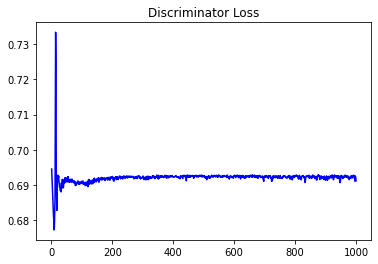

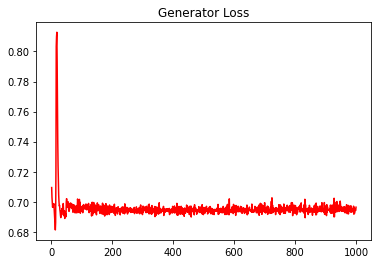

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15402845304608678


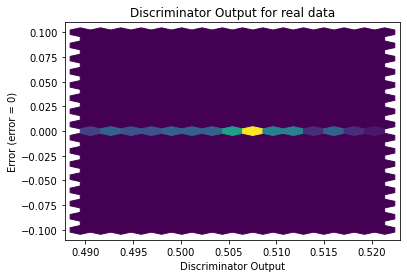

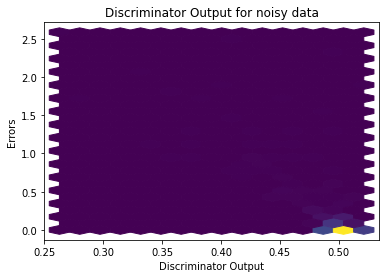

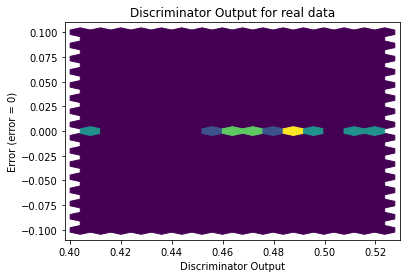

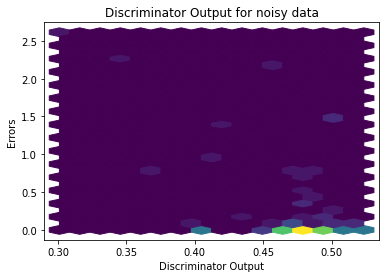

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


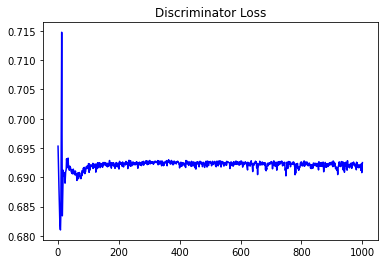

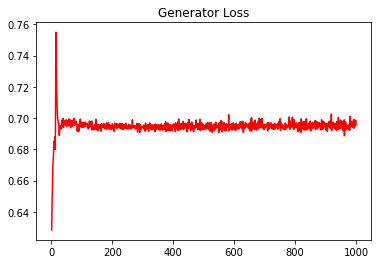

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0942886015538699


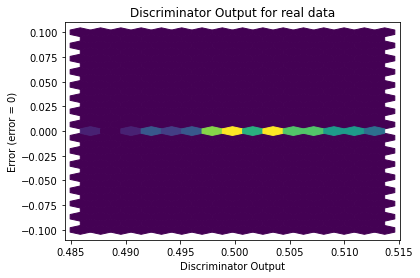

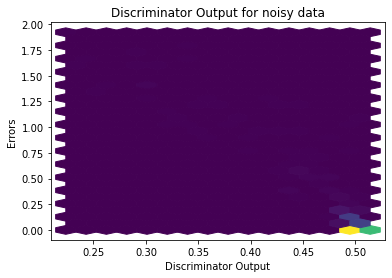

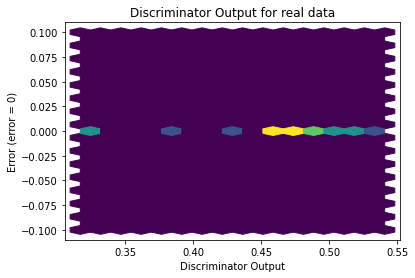

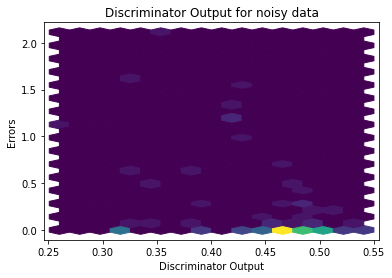

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8649]], requires_grad=True)
